In [35]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

# BMI = weight / (height * height)
# body_fat_percentage = (1.20 * BMI) + (0.23 * age) - (10.8 * bioGender) - 5.4

In [36]:
class State(TypedDict):
    name: str
    bioGender: bool #False(0) for male, True(1) for female
    age: int
    height: float
    weight: float
    bmi: float
    body_fat: float

In [37]:
def bmi_node(state: State) -> State:
    """ Calculates the BMI of people"""
    
    bmi = state["weight"] / (state["height"] * state["height"])
    state["bmi"] = round(bmi, 2)
    return state

def body_fat_for_men_node(state: State) -> State:
    bmi = state["bmi"]
    age = state["age"]
    body_fat = (1.20 * bmi) + (0.23 * age) - 10.8 - 5.4
    state["body_fat"] = round(body_fat, 2)
    return state

def body_fat_for_women_node(state: State) -> State:
    bmi = state["bmi"]
    age = state["age"]
    body_fat = (1.20 * bmi) + (0.23 * age) - 5.4
    state["body_fat"] = round(body_fat, 2)
    return state

def gender_check(state: State) -> State:
    if state["bioGender"]:
        return "body_fat_for_women"
    else:
        return "body_fat_for_men"

In [38]:
graph = StateGraph(State)

graph.add_node("bmi", bmi_node)
graph.add_node("body_fat_for_men_node", body_fat_for_men_node)
graph.add_node("body_fat_for_women_node", body_fat_for_women_node)
graph.add_node("router", lambda state:state)

graph.add_edge(START, "bmi")
graph.add_edge("bmi", "router")

graph.add_conditional_edges(
    "router",
    gender_check,
    {
        "body_fat_for_women": "body_fat_for_women_node",
        "body_fat_for_men": "body_fat_for_men_node"
    }
)

graph.add_edge("body_fat_for_women_node", END)
graph.add_edge("body_fat_for_men_node", END)

app = graph.compile()

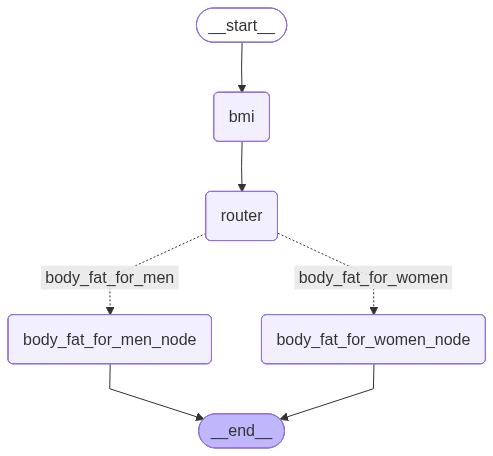

In [39]:
app

In [44]:
result = app.invoke({
    "name" : "Mamad",
    "age": 30,
    "bioGender": False,
    "height": 1.75,
    "weight": 70.0
})

In [45]:
print(result)

{'name': 'Mamad', 'bioGender': False, 'age': 30, 'height': 1.75, 'weight': 70.0, 'bmi': 22.86, 'body_fat': 18.13}
